# Constant Likelihood

Managing plateaus in nested sampling is tricky because the measure of enclosed prior volume is assumed to be monotonically decreasing. In this simple model, the model is simply,

$L(x) = P(y | x) = 1$

and

$P(x) = \mathcal{U}[x \mid 0, 1]$.

The analytic evidence for this model is,

$Z = P(y) = \int_\mathcal{X} L(x) p(x) \,\mathrm{d} x = 1$

In [1]:

import tensorflow_probability.substrates.jax as tfp
from jax import random

from jaxns import ExactNestedSampler
from jaxns import Model
from jaxns import Prior
from jaxns import TerminationCondition

tfpd = tfp.distributions

INFO[2023-06-15 15:20:47,459]: Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO[2023-06-15 15:20:47,459]: Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO[2023-06-15 15:20:47,460]: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO[2023-06-15 15:20:47,461]: Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
INFO[2023-06-15 15:20:47,461]: Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
WARNING[2023-06-15 15:20:47,462]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:

def log_likelihood(theta):
    return 0.


def prior_model():
    x = yield Prior(tfpd.Uniform(0., 1.), name='x')
    return x


model = Model(prior_model=prior_model,
              log_likelihood=log_likelihood)

log_Z_true = 0.
print(f"True log(Z)={log_Z_true}")


True log(Z)=0.0


In [3]:


# Create the nested sampler class. In this case without any tuning.
exact_ns = ExactNestedSampler(model=model, num_live_points=200, max_samples=1e4)

termination_reason, state = exact_ns(random.PRNGKey(42),
                                     term_cond=TerminationCondition(live_evidence_frac=1e-4))
results = exact_ns.to_results(state, termination_reason)


In [4]:
# We can use the summary utility to display results
exact_ns.summary(results)

--------
Termination Conditions:
--------
# likelihood evals: 200
# samples: 200
# slices: 0.0
# slices / acceptance: nan
# likelihood evals / sample: 1.0
# likelihood evals / slice: nan
--------
logZ=-0.0075 +- 0.0055
H=1.0
ESS=100
--------
x: mean +- std.dev. | 10%ile / 50%ile / 90%ile | MAP est. | max(L) est.
x: 0.5 +- 0.27 | 0.11 / 0.5 / 0.86 | 0.13 | 0.13
--------


WARNING[2023-06-15 15:20:58,649]: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


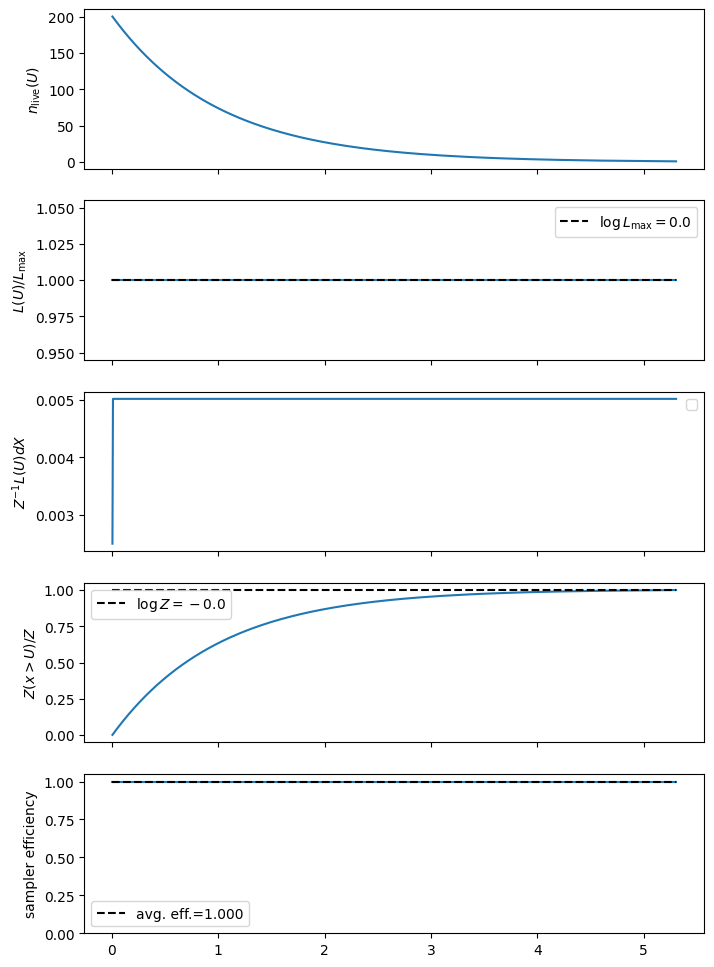

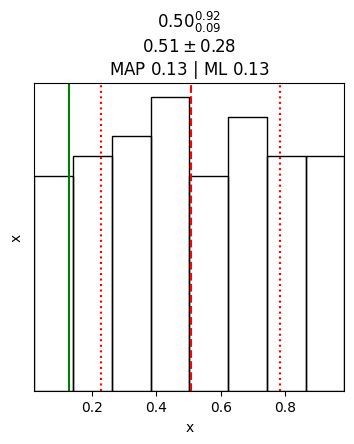

In [5]:
# We plot useful diagnostics and a distribution cornerplot
exact_ns.plot_diagnostics(results)
exact_ns.plot_cornerplot(results)